In [1]:
# use cellXgene2 conda environment
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, ttest_ind, mannwhitneyu
import gseapy
import scanpy as sc
from pybiomart import Dataset

import statsmodels.formula.api as smf

# auto reload source files
%load_ext autoreload
%autoreload 2
# add source directory to path
source_path = os.path.abspath(os.path.join('..'))
if source_path not in sys.path:
    sys.path.append(os.path.join(source_path, 'source'))
# read source files
import read_data
# colorpalettes 
hmm = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
fred_again_again_again_palette = ['#000305', '#ff7758', '#f67805', '#d3d3d3', '#565656', '#054fff', '#f9aa74', '#5890ff']
sunset = ['#f3e79b','#fac484','#f8a07e','#eb7f86','#ce6693','#a059a0','#5c53a5']
my_continous_palette = sunset
my_categorical_palette = []
my_categorical_palette.append(hmm[3])
my_categorical_palette.append(fred_again_again_again_palette[-1])
my_categorical_palette.append(fred_again_again_again_palette[-2])
my_categorical_palette.append(hmm[-1])
my_categorical_palette.append(hmm[2])
my_categorical_palette.append(sunset[-1])
my_categorical_palette.append(sunset[-2])
my_categorical_palette.append(sunset[-5])
my_categorical_palette.append(sunset[-7])

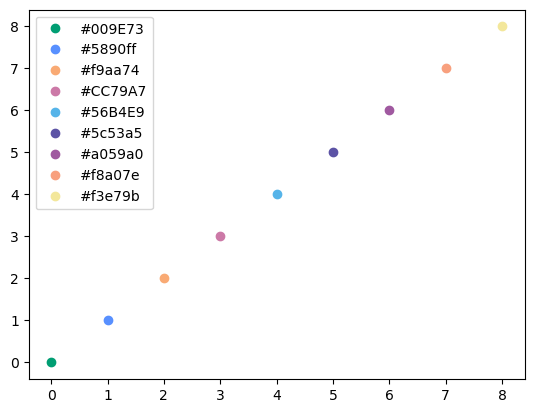

In [2]:
# create random data to plot each color, boxplot
fig, ax = plt.subplots()
for i, color in enumerate(my_categorical_palette):
    ax.plot(i, i, 'o', color=color, label=color)
plt.legend()

# Tyshkovskiy

In [138]:
loader = read_data.DatasetLoader("tyshkovskiy")
tyshkovskiy = loader.load_dataset()
# preproc
tyshkovskiy.scale_by_total_seq_depth()
tyshkovskiy.log_scale_expr()
# get dream expression
tyshkovskiy.get_dream_gene_expression()

tyshkovskiy.dream_enrichment_ssgsea()

Loading dataset: tyshkovskiy


2024-02-20 18:21:23,493 [WARNING] Input data contains NA, filled NA with 0


Converted DREAM genes to mouse genes
Found 294 DREAM genes with expression
scaled mean_dream_reg_expr by sequence depth and created mean_dream_reg_expr_resid
scaled DREAM_normalized_enrichment_score by sequence depth and created DREAM_normalized_enrichment_score_resid
scaled DREAM_enrichment_score by sequence depth and created DREAM_enrichment_score_resid


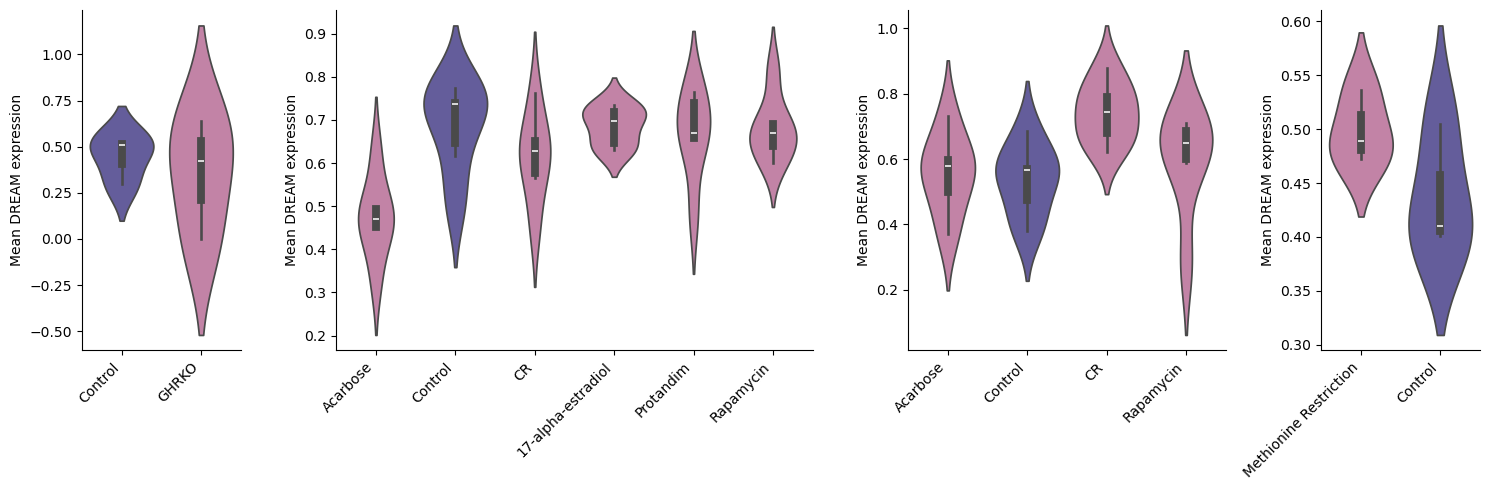

In [124]:
# make second and third plots wider
fig, axes = plt.subplots(1, 4, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 3, 2, 1]}, tight_layout=True)
palette = [my_categorical_palette[3], my_categorical_palette[5]]


tyshkovskiy.dream_expression['is_control'] = tyshkovskiy.dream_expression['condition'].str.contains('Control')
# GHRKO (5 months)
sns.violinplot(
    data = tyshkovskiy.dream_expression.query("age == 5"), y = 'DREAM_normalized_enrichment_score_resid', x = 'condition', ax = axes[0], hue = 'is_control', palette = palette
    )


# 6 months
sns.violinplot(data = tyshkovskiy.dream_expression.query("age == 6"), y = 'DREAM_normalized_enrichment_score_resid', x = 'condition', ax = axes[1],hue = 'is_control', palette = palette)


# 12 months
sns.violinplot(data = tyshkovskiy.dream_expression.query("age == 12"), y = 'DREAM_normalized_enrichment_score_resid', x = 'condition', ax = axes[2],hue = 'is_control', palette = palette)

# 14 months
sns.violinplot(data = tyshkovskiy.dream_expression.query("age == 14"), y = 'DREAM_normalized_enrichment_score_resid', x = 'condition',  ax = axes[3],hue = 'is_control', palette = palette)

for ax in axes:
    ax.legend_.remove()
    ax.set_xlabel('')
    ax.set_ylabel('Mean DREAM expression')
    ax.set_title('')
    # angle x ticks labels
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
        # set ha = 'right'
        tick.set_ha('right')

sns.despine()

In [133]:
tyshkovskiy.expression_df['age'].value_counts()

age
6     36
12    24
5      6
14     6
Name: count, dtype: int64

In [ ]:
tyshkovskiy.test_differential_dream_expression(
    class_col = 'condition',
    treatment_classes = tyshkovskiy.metadata_df.query("condition != 'Control'")['condition'].unique().tolist(),
    control_class = 'Control', secondary_grouping_col = 'age'
    )

In [147]:
tyshkovskiy.all_gs_results_df

treatment_class control_class secondary_grouping  Name  \
0                Acarbose       Control                12   gsea   
0                      CR       Control                12   gsea   
0               Rapamycin       Control                12   gsea   
0                Acarbose       Control                 6   gsea   
0                      CR       Control                 6   gsea   
0               Rapamycin       Control                 6   gsea   
0               Protandim       Control                 6   gsea   
0      17-alpha-estradiol       Control                 6   gsea   
0                   GHRKO       Control                 5   gsea   
0  Methionine Restriction       Control                14   gsea   

              Term        ES       NES NOM p-val FDR q-val FWER p-val  \
0  dream_reg_genes  -0.23234 -1.044416  0.402806  0.402806   0.396794   
0  dream_reg_genes -0.451596 -1.865842  0.006276  0.006276        0.0   
0  dream_reg_genes -0.216849 -0.905437  0.516064  0.516064    0.51004   
0  dream_reg_genes  0.437644  1.839908  0.029528  0.029528      0.015   
0  dream_reg_genes -0.291947 -1.250104  0.155431  0.155431   0.149813   
0  dream_reg_genes  0.329535  1.377855  0.144603  0.144603      0.071   
0  dream_reg_genes -0.254414  -1.03604  0.424474  0.424474   0.418738   
0  dream_reg_genes  0.317501  1.376713  0.143469  0.143469      0.067   
0  dream_reg_genes  -0.20609 -0.635775       1.0       1.0    0.89022   
0  dream_reg_genes  0.237813  1.114369  0.210526  0.210526      0.108   

     Tag %  Gene %                                         Lead_genes  \
0  154/289  52.30%  ENSMUSG00000026827;ENSMUSG00000030243;ENSMUSG0...   
0  118/290  23.61%  ENSMUSG00000025358;ENSMUSG00000019923;ENSMUSG0...   
0  165/289  57.83%  ENSMUSG00000020739;ENSMUSG00000059554;ENSMUSG0...   
0  153/293  30.72%  ENSMUSG00000052833;ENSMUSG00000021501;ENSMUSG0...   
0  138/292  49.32%  ENSMUSG00000036639;ENSMUSG00000078773;ENSMUSG0...   
0  160/291  49.33%  ENSMUSG00000057322;ENSMUSG00000042541;ENSMUSG0...   
0  153/293  49.59%  ENSMUSG00000038759;ENSMUSG00000025001;ENSMUSG0...   
0  154/292  46.95%  ENSMUSG00000042541;ENSMUSG00000062248;ENSMUSG0...   
0  130/289  56.12%  ENSMUSG00000027176;ENSMUSG00000022391;ENSMUSG0...   
0  127/291  49.99%  ENSMUSG00000019923;ENSMUSG00000027878;ENSMUSG0...   

          treatment_class  
0                Acarbose  
0                      CR  
0               Rapamycin  
0                Acarbose  
0                      CR  
0               Rapamycin  
0               Protandim  
0      17-alpha-estradiol  
0                   GHRKO  
0  Methionine Restriction

# Boutant_nestle

In [2]:
loader = read_data.DatasetLoader("boutant_nestle")
boutant_nestle = loader.load_dataset()

boutant_nestle.scale_by_total_seq_depth()
boutant_nestle.log_scale_expr()
# get dream expression
boutant_nestle.get_dream_gene_expression()

boutant_nestle.dream_enrichment_ssgsea()

Loading dataset: boutant_nestle
Converted DREAM genes to mouse genes
Found 252 DREAM genes with expression
scaled mean_dream_reg_expr by sequence depth and created mean_dream_reg_expr_resid
scaled DREAM_normalized_enrichment_score by sequence depth and created DREAM_normalized_enrichment_score_resid
scaled DREAM_enrichment_score by sequence depth and created DREAM_enrichment_score_resid


/tmp/ipykernel_3109072/2074065894.py:3: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.boxplot(


liver
Exercise 0.24025974025974026
SIRT1Tg/Tg 0.04112554112554113
CR 0.13203463203463203
muscle
Exercise 0.008658008658008658
SIRT1Tg/Tg 0.06493506493506493
CR 0.9372294372294373
BAT
Exercise 0.48484848484848486
SIRT1Tg/Tg 0.9372294372294373
CR 0.30952380952380953
WAT
Exercise 0.24025974025974026
SIRT1Tg/Tg 0.8181818181818182
CR 0.8181818181818182


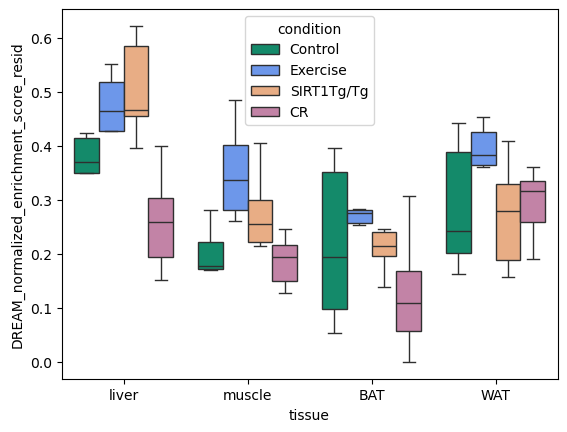

In [3]:
order = boutant_nestle.dream_expression.groupby('condition')['DREAM_normalized_enrichment_score_resid'].median().sort_values(ascending = False).index.to_list()
order = ['Control'] + [i for i in order if i != 'Control']
sns.boxplot(
    data = boutant_nestle.dream_expression,  y = 'DREAM_normalized_enrichment_score_resid', x = 'tissue', hue = 'condition', hue_order = order, dodge = True, palette = my_categorical_palette, showfliers = False
    )
# pvalues within each tissue
for tissue in boutant_nestle.dream_expression['tissue'].unique():
    print(tissue)
    for condition in order[1:]:
        print(condition, mannwhitneyu(
            boutant_nestle.dream_expression.query(f"tissue == '{tissue}' & condition == 'Control'")['DREAM_normalized_enrichment_score_resid'],
            boutant_nestle.dream_expression.query(f"tissue == '{tissue}' & condition == '{condition}'")['DREAM_normalized_enrichment_score_resid']
        ).pvalue)

In [4]:
boutant_nestle.test_differential_dream_expression(
    class_col = 'condition',
    treatment_classes = boutant_nestle.metadata_df.query("condition != 'Control'")['condition'].unique().tolist(),
    control_class = 'Control', secondary_grouping_col = 'tissue'
    )

finished SIRT1Tg/Tg vs.  Control in liver
finished CR vs.  Control in liver
finished Exercise vs.  Control in liver
finished SIRT1Tg/Tg vs.  Control in muscle
finished CR vs.  Control in muscle
finished Exercise vs.  Control in muscle
finished SIRT1Tg/Tg vs.  Control in BAT
finished CR vs.  Control in BAT
finished Exercise vs.  Control in BAT
finished SIRT1Tg/Tg vs.  Control in WAT
finished CR vs.  Control in WAT
finished Exercise vs.  Control in WAT


In [5]:
boutant_nestle.all_gs_results_df

treatment_class control_class secondary_grouping  Name             Term  \
0      SIRT1Tg/Tg       Control              liver  gsea  dream_reg_genes   
0              CR       Control              liver  gsea  dream_reg_genes   
0        Exercise       Control              liver  gsea  dream_reg_genes   
0      SIRT1Tg/Tg       Control             muscle  gsea  dream_reg_genes   
0              CR       Control             muscle  gsea  dream_reg_genes   
0        Exercise       Control             muscle  gsea  dream_reg_genes   
0      SIRT1Tg/Tg       Control                BAT  gsea  dream_reg_genes   
0              CR       Control                BAT  gsea  dream_reg_genes   
0        Exercise       Control                BAT  gsea  dream_reg_genes   
0      SIRT1Tg/Tg       Control                WAT  gsea  dream_reg_genes   
0              CR       Control                WAT  gsea  dream_reg_genes   
0        Exercise       Control                WAT  gsea  dream_reg_genes   

         ES       NES NOM p-val FDR q-val FWER p-val    Tag %  Gene %  \
0  0.136619   0.74122  0.947368  0.947368      0.504  208/252  76.55%   
0  0.210096  0.835106  0.679825  0.679825       0.31  252/252  99.57%   
0 -0.271529  -1.10156   0.30916   0.30916   0.303435  155/252  53.48%   
0 -0.212827 -0.816548  0.764113  0.764113   0.758065  252/252  99.68%   
0  0.245482   1.18982  0.163223  0.163223      0.079  117/252  40.96%   
0 -0.165746 -0.824338  0.789575  0.789575   0.783784  252/252  99.65%   
0   0.20854  0.855337  0.780083  0.780083      0.376  181/252  67.31%   
0  0.236402  0.962679   0.56338   0.56338       0.28  179/252  64.23%   
0  0.221265  0.928453  0.631902  0.631902      0.309  124/252  50.09%   
0  0.314652  1.241063   0.13843   0.13843      0.067  135/252  48.35%   
0  0.177539  0.686796  0.931507  0.931507      0.476  170/252  63.04%   
0  0.203602  0.778699   0.84739   0.84739      0.422  179/252  66.77%   

                                          Lead_genes treatment_class  
0  ENSMUSG00000050213;ENSMUSG00000046785;ENSMUSG0...      SIRT1Tg/Tg  
0  ENSMUSG00000024742;ENSMUSG00000027018;ENSMUSG0...              CR  
0  ENSMUSG00000022035;ENSMUSG00000025358;ENSMUSG0...        Exercise  
0  ENSMUSG00000031546;ENSMUSG00000057322;ENSMUSG0...      SIRT1Tg/Tg  
0  ENSMUSG00000022048;ENSMUSG00000023832;ENSMUSG0...              CR  
0  ENSMUSG00000114279;ENSMUSG00000010362;ENSMUSG0...        Exercise  
0  ENSMUSG00000030619;ENSMUSG00000058355;ENSMUSG0...      SIRT1Tg/Tg  
0  ENSMUSG00000033970;ENSMUSG00000029283;ENSMUSG0...              CR  
0  ENSMUSG00000068854;ENSMUSG00000041133;ENSMUSG0...        Exercise  
0  ENSMUSG00000040084;ENSMUSG00000044934;ENSMUSG0...      SIRT1Tg/Tg  
0  ENSMUSG00000030611;ENSMUSG00000020321;ENSMUSG0...              CR  
0  ENSMUSG00000028693;ENSMUSG00000036202;ENSMUSG0...        Exercise

# martin_montalvo

In [74]:
loader = read_data.DatasetLoader("martin_montalvo")
martin_montalvo = loader.load_dataset()

martin_montalvo.scale_by_total_seq_depth()
martin_montalvo.log_scale_expr()
# get dream expression
martin_montalvo.get_dream_gene_expression()

martin_montalvo.dream_enrichment_ssgsea()

Loading dataset: martin_montalvo


2024-02-21 15:12:48,647 [WARNING] Input data contains NA, filled NA with 0


Converted DREAM genes to mouse genes
Found 252 DREAM genes with expression
scaled mean_dream_reg_expr by sequence depth and created mean_dream_reg_expr_resid
scaled DREAM_normalized_enrichment_score by sequence depth and created DREAM_normalized_enrichment_score_resid
scaled DREAM_enrichment_score by sequence depth and created DREAM_enrichment_score_resid


Muscle
Metformin 0.42063492063492064
CR 0.15079365079365079
Liver
Metformin 0.30952380952380953
CR 1.0


/tmp/ipykernel_3184295/4102202154.py:3: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.boxplot(
/tmp/ipykernel_3184295/4102202154.py:6: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


Text(0.5, 0, 'Condition')

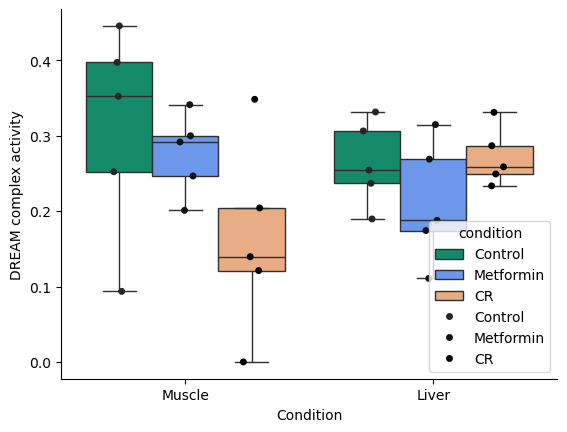

In [77]:
order = martin_montalvo.dream_expression.groupby('condition')['DREAM_normalized_enrichment_score_resid'].median().sort_values(ascending = False).index.to_list()
order = ['Control'] + [i for i in order if i != 'Control']
sns.boxplot(
    data = martin_montalvo.dream_expression,  y = 'DREAM_normalized_enrichment_score_resid', x = 'tissue', hue = 'condition', hue_order = order, dodge = True, palette = my_categorical_palette, showfliers = False
    )
sns.stripplot(
    data = martin_montalvo.dream_expression,  y = 'DREAM_normalized_enrichment_score_resid', x = 'tissue', hue = 'condition', hue_order = order, dodge = True,color = 'black'
    )
# pvalues within each tissue
for tissue in martin_montalvo.dream_expression['tissue'].unique():
    print(tissue)
    for condition in order[1:]:
        print(condition, mannwhitneyu(
            martin_montalvo.dream_expression.query(f"tissue == '{tissue}' & condition == 'Control'")['DREAM_normalized_enrichment_score_resid'],
            martin_montalvo.dream_expression.query(f"tissue == '{tissue}' & condition == '{condition}'")['DREAM_normalized_enrichment_score_resid']
        ).pvalue)
sns.despine()
plt.ylabel('DREAM complex activity')
plt.xlabel('Condition')

In [78]:
martin_montalvo.test_differential_dream_expression(
    class_col = 'condition',
    treatment_classes = martin_montalvo.metadata_df.query("condition != 'Control'")['condition'].unique().tolist(),
    control_class = 'Control', secondary_grouping_col = 'tissue'
    )

2024-02-21 15:20:34,910 [WARNING] Input data contains NA, filled NA with 0


finished Metformin vs.  Control in Muscle


2024-02-21 15:20:35,627 [WARNING] Input data contains NA, filled NA with 0


finished CR vs.  Control in Muscle


2024-02-21 15:20:36,337 [WARNING] Input data contains NA, filled NA with 0


finished Metformin vs.  Control in Liver


2024-02-21 15:20:36,982 [WARNING] Input data contains NA, filled NA with 0


finished CR vs.  Control in Liver


In [80]:
martin_montalvo.all_gs_results_df[['treatment_class', 'control_class', 'secondary_grouping', 'NES', 'FWER p-val']]

treatment_class control_class secondary_grouping       NES FWER p-val
0       Metformin       Control             Muscle -0.611276   0.998886
0              CR       Control             Muscle  1.762365        0.0
0       Metformin       Control              Liver  1.320312       0.03
0              CR       Control              Liver  1.346778      0.025

# pavlovics_parabiosis

In [96]:
from glob import glob
all_files = glob("/cellar/users/zkoch/dream/data/palovics_parabiosis/*h5ad")
# remove '/cellar/users/zkoch/dream/data/palovics_parabiosis/downloader.sh'
all_files = [i for i in all_files if 'all_tissues_only_parabiosis_no_tms' not in i]
# loop over files, reading them in with scanpy, and adding them to a list
adatas = []
for fn in all_files:
    adata = sc.read(fn)
    adatas.append(adata)
# combine all adatas into one
adata = adatas[0].concatenate(adatas[1:])
# write to file
adata.write("/cellar/users/zkoch/dream/data/palovics_parabiosis/all_tissues.h5ad")

/cellar/users/zkoch/miniconda3/envs/cellXgene2/lib/python3.8/site-packages/anndata/_core/anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


In [104]:
loader = read_data.DatasetLoader("palovics_parabiosis")
palovics_parabiosis = loader.load_dataset()
palovics_parabiosis.pre_process()

Loading dataset: palovics_parabiosis
filtering out 405 cells with more than 10,000,000 total counts out of 122280 cells


/cellar/users/zkoch/miniconda3/envs/cellXgene2/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:372: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [ ]:
palovics_parabiosis.dream_enrichment_ssgsea()
palovics_parabiosis.adata.obs['DREAM_normalized_enrichment_score'] = palovics_parabiosis.dream_expression['DREAM_normalized_enrichment_score']
palovics_parabiosis.adata.obs['DREAM_enrichment_score'] = palovics_parabiosis.dream_expression['DREAM_enrichment_score']
palovics_parabiosis.adata.write("/cellar/users/zkoch/dream/data/palovics_parabiosis/all_tissues_with_ssgsea.h5ad")

In [105]:
palovics_parabiosis.get_dream_gene_expression()
palovics_parabiosis.dream_expression.obs['mean_dream_activity'] = np.mean(
    palovics_parabiosis.dream_expression.X, axis=1
    )
# get resid of mean dream activity
mut_ols = smf.ols(
    formula='mean_dream_activity ~ total_counts * n_genes',
    data=palovics_parabiosis.dream_expression.obs
    ).fit()
palovics_parabiosis.dream_expression.obs['mean_dream_activity_resid'] = mut_ols.resid
# invert residuals making highest values low and lowest values high
palovics_parabiosis.dream_expression.obs['mean_dream_activity_resid'] = -1 * palovics_parabiosis.dream_expression.obs['mean_dream_activity_resid']
# then add the min value to make all values positive
palovics_parabiosis.dream_expression.obs['mean_dream_activity_resid'] = palovics_parabiosis.dream_expression.obs['mean_dream_activity_resid'] - min(palovics_parabiosis.dream_expression.obs['mean_dream_activity_resid'])

Found 274 DREAM genes with expression


In [120]:
palovics_parabiosis.dream_expression.obs['cell_type'].value_counts()

cell_type
microglial cell                         17179
b cell                                  11526
endothelial cell                        10963
stromal cell                             9190
fibroblast                               6658
granulocyte                              6227
t cell                                   4339
monocyte                                 4168
basal cell                               3949
hematopoietic stem cell                  3896
macrophage                               3877
keratinocyte                             3716
urothelial cell                          3665
oligodendrocyte                          3184
satellite cell                           3164
thymocyte                                3135
beta cell                                2933
smooth muscle cell                       2694
secretory cell                           1969
epithelial cell                          1830
hepatocyte                               1502
crypt stem cell         

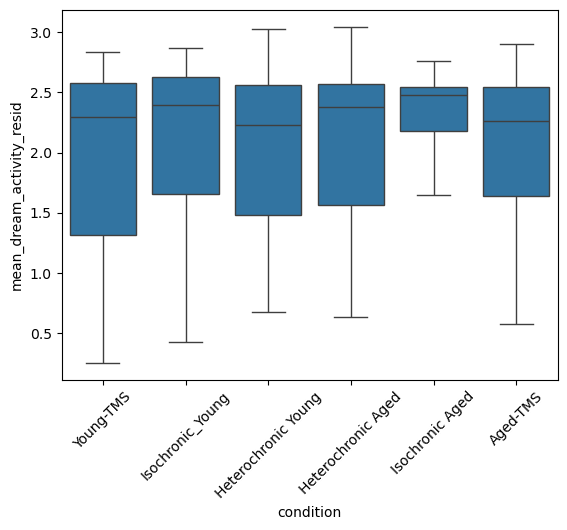

In [126]:
sns.boxplot(
    data = palovics_parabiosis.dream_expression.obs.query("cell_type == 'hematopoietic stem cell'"), y = 'mean_dream_activity_resid', x = 'condition', showfliers = False, order = ['Young-TMS','Isochronic_Young', 'Heterochronic Young', 'Heterochronic Aged', 'Isochronic Aged', 'Aged-TMS']
    )
# angle x ticks labels
_ = plt.xticks(rotation=45)

# ma_sc_rat_CR

In [41]:
from glob import glob
# directory filled with barcodes.tsv.gz, genes.tsv.gz, and matrix.mtx.gz files
data_dir = "/cellar/users/zkoch/dream/data/ma_sc_rat_CR"
all_files = os.listdir(data_dir)
file_prefixes = [i.split("_")[0] + '_' + i.split("_")[1] + '_' for i in all_files]
# remove any file prfix that doesn't start with GSM
file_prefixes = [i for i in file_prefixes if i.startswith('GSM')]
# remove any file prefix that contains GL or BX
file_prefixes = [i for i in file_prefixes if 'GL' not in i and 'BX' not in i]
file_prefixes = list(set(file_prefixes))

In [120]:
all_adatas = []
for prefix in file_prefixes:
    adata = sc.read_10x_mtx(
        data_dir,
        prefix = prefix
    )
    adata.obs['gender'] = prefix.split("-")[1]
    # keep only everything after the last number in tissue
    adata.obs['sample'] = prefix[:-1]
    all_adatas.append(adata)
# concatenate all adatas into one
adata = all_adatas[0].concatenate(all_adatas[1:])
# write out ad h5ad
adata.write("/cellar/users/zkoch/dream/data/ma_sc_rat_CR/all_tissues.h5ad")

/cellar/users/zkoch/miniconda3/envs/cellXgene2/lib/python3.8/site-packages/anndata/_core/anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


In [7]:
loader = read_data.DatasetLoader("ma_sc_rat_CR")
ma_sc_rat_cr = loader.load_dataset()
#ma_sc_rat_cr.pre_process(log_scale = False)
ma_sc_rat_cr.get_dream_gene_expression()
ma_sc_rat_cr.scale_by_seq_depth(col_name = 'DREAM_normalized_enrichment_score')
"""
ma_sc_rat_cr.dream_enrichment_ssgsea()
# write ma_sc_rat_cr.adata to h5ad
ma_sc_rat_cr.adata.write("/cellar/users/zkoch/dream/data/ma_sc_rat_CR/all_tissues_with_ssgsea.h5ad")
"""

Loading dataset: ma_sc_rat_CR
Found 261 DREAM genes with expression
scaled mean_dream_activity by sequence depth and created mean_dream_activity_resid
scaled DREAM_normalized_enrichment_score by sequence depth and created DREAM_normalized_enrichment_score_resid


'\nma_sc_rat_cr.dream_enrichment_ssgsea()\n# write ma_sc_rat_cr.adata to h5ad\nma_sc_rat_cr.adata.write("/cellar/users/zkoch/dream/data/ma_sc_rat_CR/all_tissues_with_ssgsea.h5ad")\n'

In [9]:
ma_sc_rat_cr.dream_expression.obs

gender                sample batch sample_title sample_geo_accession  \
0           M  GSM4331810_Aorta-M-Y     0    Aorta-M-Y           GSM4331810   
1           M  GSM4331810_Aorta-M-Y     0    Aorta-M-Y           GSM4331810   
2           M  GSM4331810_Aorta-M-Y     0    Aorta-M-Y           GSM4331810   
3           M  GSM4331810_Aorta-M-Y     0    Aorta-M-Y           GSM4331810   
4           M  GSM4331810_Aorta-M-Y     0    Aorta-M-Y           GSM4331810   
...       ...                   ...   ...          ...                  ...   
234596      M   GSM4331818_BAT-M-CR    53     BAT-M-CR           GSM4331818   
234597      M   GSM4331818_BAT-M-CR    53     BAT-M-CR           GSM4331818   
234598      M   GSM4331818_BAT-M-CR    53     BAT-M-CR           GSM4331818   
234599      M   GSM4331818_BAT-M-CR    53     BAT-M-CR           GSM4331818   
234600      M   GSM4331818_BAT-M-CR    53     BAT-M-CR           GSM4331818   

                      tissue condition  n_genes  n_genes_by_counts  \
0                      Aorta      Y-AL     1636               1636   
1                      Aorta      Y-AL     1911               1911   
2                      Aorta      Y-AL     1579               1579   
3                      Aorta      Y-AL     1523               1523   
4                      Aorta      Y-AL     1034               1034   
...                      ...       ...      ...                ...   
234596  Brown adipose tissue      O-CR      483                483   
234597  Brown adipose tissue      O-CR     1031               1031   
234598  Brown adipose tissue      O-CR      884                884   
234599  Brown adipose tissue      O-CR      422                422   
234600  Brown adipose tissue      O-CR      686                686   

        total_counts  outlier_total_counts  DREAM_enrichment_score  \
0        3553.598877                 False             -209.383283   
1        4181.767578                 False              194.666216   
2        3285.102051                 False              106.172170   
3        3274.148438                 False             -117.682813   
4        1680.490479                 False             -129.576259   
...              ...                   ...                     ...   
234596    688.327759                 False             -216.841950   
234597   1625.942627                 False               62.641251   
234598   1401.177612                 False              -99.043723   
234599    569.434448                 False             -269.131242   
234600   1006.955200                 False             -201.743192   

        DREAM_normalized_enrichment_score  mean_dream_activity  \
0                               -0.139965             0.243892   
1                                0.130127             0.304785   
2                                0.070972             0.303992   
3                               -0.078667             0.238100   
4                               -0.086617             0.114928   
...                                   ...                  ...   
234596                          -0.144951             0.069519   
234597                           0.041873             0.118048   
234598                          -0.066207             0.110461   
234599                          -0.179905             0.024454   
234600                          -0.134858             0.053183   

        mean_dream_activity_resid  DREAM_normalized_enrichment_score_resid  
0                        0.513424                                 0.590595  
1                        0.498995                                 0.351574  
2                        0.433831                                 0.373534  
3                        0.498559                                 0.516666  
4                        0.504577                                 0.471608  
...                           ...                                      ...  
234596                   0.474728           

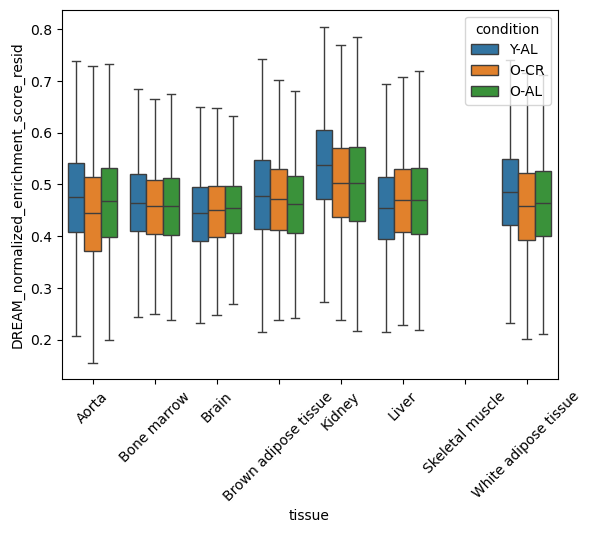

In [10]:
# with tissue in resid
sns.boxplot(data = ma_sc_rat_cr.dream_expression.obs, y = 'DREAM_normalized_enrichment_score_resid', hue = 'condition', x = 'tissue', showfliers = False, hue_order=['Y-AL', 'O-CR', 'O-AL'])
# angle x ticks
_ = plt.xticks(rotation=45)

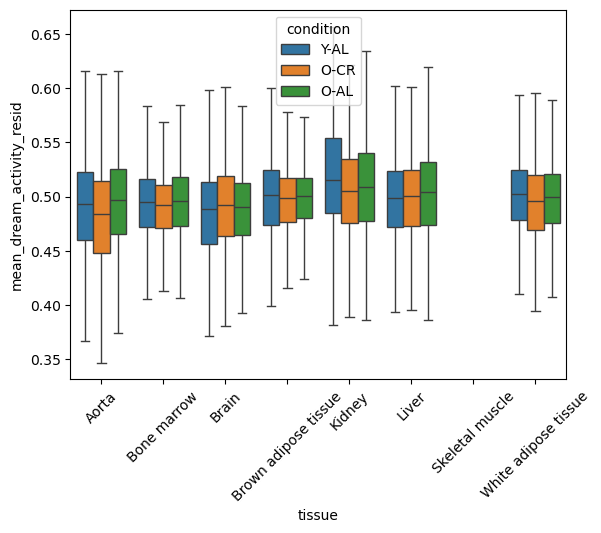

In [36]:
# with tissue in resid
sns.boxplot(data = ma_sc_rat_cr.dream_expression.obs, y = 'mean_dream_activity_resid', hue = 'condition', x = 'tissue', showfliers = False, hue_order=['Y-AL', 'O-CR', 'O-AL'])
# angle x ticks
_ = plt.xticks(rotation=45)

<Axes: xlabel='tissue', ylabel='mean_dream_activity'>

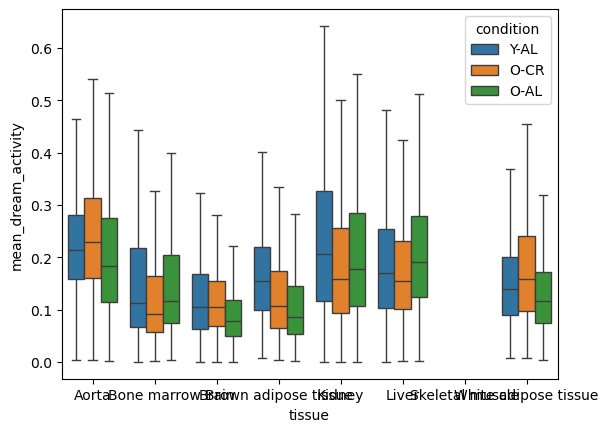

In [38]:
sns.boxplot(data = ma_sc_rat_cr.dream_expression.obs, y = 'mean_dream_activity', hue = 'condition', x = 'tissue', showfliers = False, hue_order=['Y-AL', 'O-CR', 'O-AL'])

# zhou_2012

In [59]:
loader = read_data.DatasetLoader("zhou_2012")
zhou_2012 = loader.load_dataset()
zhou_2012.scale_by_total_seq_depth()
zhou_2012.log_scale_expr()
# get dream expression
zhou_2012.get_dream_gene_expression()
zhou_2012.dream_enrichment_ssgsea()


Loading dataset: zhou_2012
Converted DREAM genes to mouse genes
Found 277 DREAM genes with expression
scaled mean_dream_reg_expr by sequence depth and created mean_dream_reg_expr_resid
scaled DREAM_normalized_enrichment_score by sequence depth and created DREAM_normalized_enrichment_score_resid
scaled DREAM_enrichment_score by sequence depth and created DREAM_enrichment_score_resid


/tmp/ipykernel_3184295/926284905.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_3184295/926284905.py:5: UserWarning: The palette list has more values (9) than needed (6), which may not be intended.
  sns.boxplot(


LF LF+Exercise 1.0
LF LF+CR 0.1
LF HF 0.7
LF HF+Exercise 0.1
LF HF+CR 0.4
LF+Exercise LF 1.0
LF+Exercise LF+CR 0.1
LF+Exercise HF 1.0
LF+Exercise HF+Exercise 0.1
LF+Exercise HF+CR 0.4
LF+CR LF 0.1
LF+CR LF+Exercise 0.1
LF+CR HF 0.4
LF+CR HF+Exercise 0.4
LF+CR HF+CR 1.0
HF LF 0.7
HF LF+Exercise 1.0
HF LF+CR 0.4
HF HF+Exercise 0.7
HF HF+CR 1.0
HF+Exercise LF 0.1
HF+Exercise LF+Exercise 0.1
HF+Exercise LF+CR 0.4
HF+Exercise HF 0.7
HF+Exercise HF+CR 0.7
HF+CR LF 0.4
HF+CR LF+Exercise 0.4
HF+CR LF+CR 1.0
HF+CR HF 1.0
HF+CR HF+Exercise 0.7


Text(0.5, 0, 'Condition')

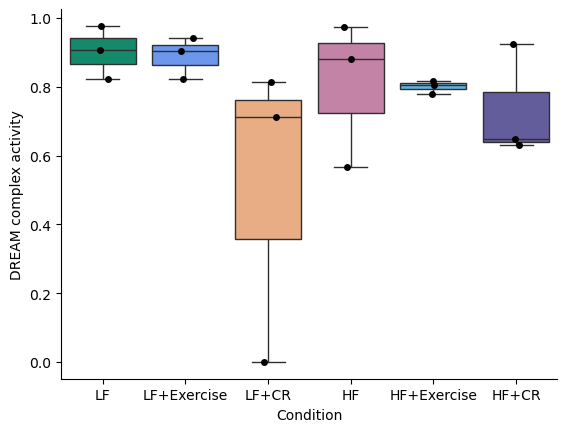

In [72]:
sns.stripplot(
    data = zhou_2012.dream_expression, y = 'DREAM_normalized_enrichment_score_resid',
    x = 'condition', color = 'black'
    )
sns.boxplot(
    data = zhou_2012.dream_expression, y = 'DREAM_normalized_enrichment_score_resid',
    x = 'condition', palette=my_categorical_palette
    )
# do mannwhitney u test between each pair of conditions
for condition in zhou_2012.dream_expression['condition'].unique():
    for other_condition in zhou_2012.dream_expression['condition'].unique():
        if condition != other_condition:
            print(condition, other_condition, mannwhitneyu(
                zhou_2012.dream_expression.query(f"condition == '{condition}'")['DREAM_normalized_enrichment_score_resid'],
                zhou_2012.dream_expression.query(f"condition == '{other_condition}'")['DREAM_normalized_enrichment_score_resid']
            ).pvalue)
sns.despine()
plt.ylabel('DREAM complex activity')
plt.xlabel('Condition')

In [73]:
zhou_2012.metadata_df

sample sample_title sample_geo_accession   sex  age_months tissue  \
0   GSM900982         LF_1            GSM900982  male          62  liver   
1   GSM901053         LF_2            GSM901053  male          62  liver   
2   GSM901054         LF_3            GSM901054  male          62  liver   
3   GSM901055      LF+Ex_1            GSM901055  male          62  liver   
4   GSM901056      LF+Ex_2            GSM901056  male          62  liver   
5   GSM901057      LF+Ex_3            GSM901057  male          62  liver   
6   GSM901058      LF+CR_1            GSM901058  male          62  liver   
7   GSM901059      LF+CR_2            GSM901059  male          62  liver   
8   GSM901060      LF+CR_3            GSM901060  male          62  liver   
9   GSM901061         HF_1            GSM901061  male          62  liver   
10  GSM901062         HF_2            GSM901062  male          62  liver   
11  GSM901063         HF_3            GSM901063  male          62  liver   
12  GSM901064      HF+Ex_1            GSM901064  male          62  liver   
13  GSM901065      HF+Ex_2            GSM901065  male          62  liver   
14  GSM901066      HF+Ex_3            GSM901066  male          62  liver   
15  GSM901067      HF+CR_1            GSM901067  male          62  liver   
16  GSM901068      HF+CR_2            GSM901068  male          62  liver   
17  GSM901087      HF+CR_3            GSM901087  male          62  liver   

      condition is_high_fat condition2  
0            LF          LF    Control  
1            LF          LF    Control  
2            LF          LF    Control  
3   LF+Exercise          LF   Exercise  
4   LF+Exercise          LF   Exercise  
5   LF+Exercise          LF   Exercise  
6         LF+CR          LF         CR  
7         LF+CR          LF         CR  
8         LF+CR          LF         CR  
9            HF          HF    Control  
10           HF          HF    Control  
11           HF          HF    Control  
12  HF+Exercise          HF   Exercise  
13  HF+Exercise          HF   Exercise  
14  HF+Exercise          HF   Exercise  
15        HF+CR          HF         CR  
16        HF+CR          HF         CR  
17        HF+CR          HF         CR

In [62]:
zhou_2012.expression_df['is_high_fat'] = zhou_2012.expression_df['condition'].str.contains('HF')
zhou_2012.expression_df['is_high_fat'] = zhou_2012.expression_df['is_high_fat'].map({True:'HF', False:'LF'})
zhou_2012.metadata_df['is_high_fat'] = zhou_2012.metadata_df['condition'].str.contains('HF')
zhou_2012.metadata_df['is_high_fat'] = zhou_2012.metadata_df['is_high_fat'].map({True:'HF', False:'LF'})
zhou_2012.expression_df['condition2'] = zhou_2012.expression_df['condition'].map({
    'LF':'Control', 'LF+Exercise':'Exercise','LF+CR':'CR', 'HF+Exercise':'Exercise', 'HF':'Control', 'HF+CR':'CR'
})
zhou_2012.metadata_df['condition2'] = zhou_2012.metadata_df['condition'].map({
    'LF':'Control', 'LF+Exercise':'Exercise','LF+CR':'CR', 'HF+Exercise':'Exercise', 'HF':'Control', 'HF+CR':'CR'
})
zhou_2012.meta_cols.append('condition2')
zhou_2012.meta_cols.append('is_high_fat')

zhou_2012.test_differential_dream_expression(
    class_col = 'condition2',
    treatment_classes = zhou_2012.metadata_df.query("condition2 != 'Control'")['condition2'].unique().tolist(),
    control_class = 'Control', secondary_grouping_col = 'is_high_fat'
    )

finished Exercise vs.  Control in LF
finished CR vs.  Control in LF
finished Exercise vs.  Control in HF
finished CR vs.  Control in HF


In [63]:
zhou_2012.all_gs_results_df

treatment_class control_class secondary_grouping  Name             Term  \
0        Exercise       Control                 LF  gsea  dream_reg_genes   
0              CR       Control                 LF  gsea  dream_reg_genes   
0        Exercise       Control                 HF  gsea  dream_reg_genes   
0              CR       Control                 HF  gsea  dream_reg_genes   

         ES       NES NOM p-val FDR q-val FWER p-val    Tag %  Gene %  \
0 -0.265933 -1.088048  0.276302  0.276302   0.276302   87/277  28.22%   
0  0.347449  1.574624       0.0       0.0        0.0  120/277  25.95%   
0 -0.260892 -1.208947  0.067594  0.067594   0.067594   55/277  16.82%   
0  0.225417  1.000883   0.45006   0.45006      0.374   49/277  16.30%   

                                          Lead_genes  
0  ENSMUSG00000040084;ENSMUSG00000024604;ENSMUSG0...  
0  ENSMUSG00000052565;ENSMUSG00000023832;ENSMUSG0...  
0  ENSMUSG00000027878;ENSMUSG00000031928;ENSMUSG0...  
0  ENSMUSG00000040195;ENSMUSG00000048012;ENSMUSG0...

# Fok 2014

In [34]:
loader = read_data.DatasetLoader("fok_chronic_2014")
fok_chronic_2014 = loader.load_dataset()
fok_chronic_2014.scale_by_total_seq_depth()
#fok_2014.log_scale_expr()
# get dream expression
fok_chronic_2014.get_dream_gene_expression()
fok_chronic_2014.dream_enrichment_ssgsea()

Loading dataset: fok_chronic_2014
Converted DREAM genes to mouse genes
Found 252 DREAM genes with expression
scaled mean_dream_reg_expr by sequence depth and created mean_dream_reg_expr_resid
scaled DREAM_normalized_enrichment_score by sequence depth and created DREAM_normalized_enrichment_score_resid
scaled DREAM_enrichment_score by sequence depth and created DREAM_enrichment_score_resid


In [35]:
loader = read_data.DatasetLoader("fok_short_term_2014")
fok_short_term_2014 = loader.load_dataset()
fok_short_term_2014.scale_by_total_seq_depth()
#fok_2014.log_scale_expr()
# get dream expression
fok_short_term_2014.get_dream_gene_expression()
fok_short_term_2014.dream_enrichment_ssgsea()

Loading dataset: fok_short_term_2014
Converted DREAM genes to mouse genes
Found 203 DREAM genes with expression
scaled mean_dream_reg_expr by sequence depth and created mean_dream_reg_expr_resid
scaled DREAM_normalized_enrichment_score by sequence depth and created DREAM_normalized_enrichment_score_resid
scaled DREAM_enrichment_score by sequence depth and created DREAM_enrichment_score_resid


/tmp/ipykernel_3109072/2242206545.py:1: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.violinplot(


<Axes: xlabel='sex', ylabel='DREAM_normalized_enrichment_score_resid'>

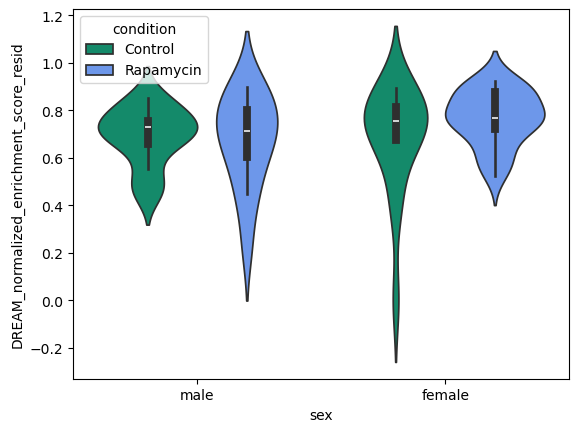

In [36]:
sns.violinplot(
    data = fok_chronic_2014.dream_expression, y = 'DREAM_normalized_enrichment_score_resid',
    hue = 'condition', palette=my_categorical_palette, x = 'sex'
    )

/tmp/ipykernel_3109072/2205976467.py:1: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.violinplot(


<Axes: xlabel='sex', ylabel='DREAM_normalized_enrichment_score_resid'>

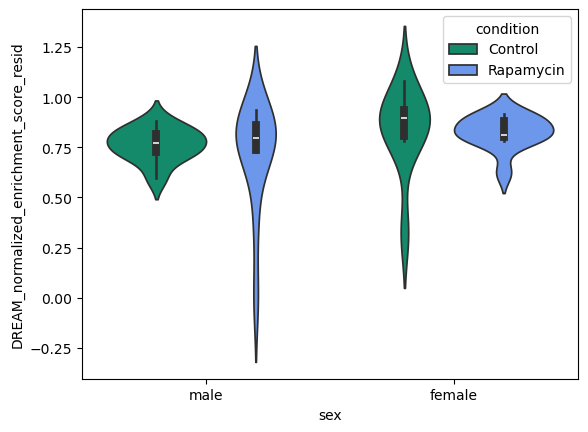

In [37]:
sns.violinplot(
    data = fok_short_term_2014.dream_expression, y = 'DREAM_normalized_enrichment_score_resid',
    hue = 'condition', palette=my_categorical_palette, x = 'sex'
    )

In [38]:
fok_chronic_2014.test_differential_dream_expression(
    class_col = 'condition',
    treatment_classes = fok_chronic_2014.metadata_df.query("condition != 'Control'")['condition'].unique().tolist(),
    control_class = 'Control', secondary_grouping_col = 'sex'
    )

finished Rapamycin vs.  Control in male
finished Rapamycin vs.  Control in female


In [39]:
fok_chronic_2014.all_gs_results_df

treatment_class control_class secondary_grouping  Name             Term  \
0       Rapamycin       Control               male  gsea  dream_reg_genes   
0       Rapamycin       Control             female  gsea  dream_reg_genes   

         ES       NES NOM p-val FDR q-val FWER p-val    Tag %  Gene %  \
0 -0.186102  -0.79812  0.724951  0.724951   0.724951  252/252  99.66%   
0 -0.242625 -0.920707  0.582627  0.582627   0.582627  138/252  39.16%   

                                          Lead_genes treatment_class  
0  ENSMUSG00000024878;ENSMUSG00000026511;ENSMUSG0...       Rapamycin  
0  ENSMUSG00000042541;ENSMUSG00000026511;ENSMUSG0...       Rapamycin

In [40]:
fok_short_term_2014.test_differential_dream_expression(
    class_col = 'condition',
    treatment_classes = fok_short_term_2014.metadata_df.query("condition != 'Control'")['condition'].unique().tolist(),
    control_class = 'Control', secondary_grouping_col = 'sex'
    )

finished Rapamycin vs.  Control in male
finished Rapamycin vs.  Control in female


In [41]:
fok_short_term_2014.all_gs_results_df

treatment_class control_class secondary_grouping  Name             Term  \
0       Rapamycin       Control               male  gsea  dream_reg_genes   
0       Rapamycin       Control             female  gsea  dream_reg_genes   

         ES       NES NOM p-val FDR q-val FWER p-val    Tag %  Gene %  \
0  0.305737   1.07339  0.429112  0.429112      0.227  109/203  40.98%   
0 -0.303457 -1.022139  0.460526  0.460526   0.460526   98/203  38.34%   

                                          Lead_genes treatment_class  
0  ENSMUSG00000022370;ENSMUSG00000027342;ENSMUSG0...       Rapamycin  
0  ENSMUSG00000022370;ENSMUSG00000062822;ENSMUSG0...       Rapamycin

# Fok CR 2014

In [22]:
loader = read_data.DatasetLoader("fok_cr_2014")
fok_cr_2014 = loader.load_dataset()
fok_cr_2014.scale_by_total_seq_depth()
#fok_2014.log_scale_expr()
# get dream expression
fok_cr_2014.get_dream_gene_expression()
fok_cr_2014.dream_enrichment_ssgsea()

Loading dataset: fok_cr_2014
Converted DREAM genes to mouse genes
Found 252 DREAM genes with expression
scaled mean_dream_reg_expr by sequence depth and created mean_dream_reg_expr_resid
scaled DREAM_normalized_enrichment_score by sequence depth and created DREAM_normalized_enrichment_score_resid
scaled DREAM_enrichment_score by sequence depth and created DREAM_enrichment_score_resid


/tmp/ipykernel_3109072/2605668124.py:1: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.swarmplot(


Control CR 0.04178899680298453
Control Rapamycin 0.010644786560634337
Control Rapamycin+CR 0.010644786560634337
CR Control 0.04178899680298453
CR Rapamycin 0.20706115487008614
CR Rapamycin+CR 0.4060484491047267
Rapamycin Control 0.010644786560634337
Rapamycin CR 0.20706115487008614
Rapamycin Rapamycin+CR 0.5443701458566098
Rapamycin+CR Control 0.010644786560634337
Rapamycin+CR CR 0.4060484491047267
Rapamycin+CR Rapamycin 0.5443701458566098


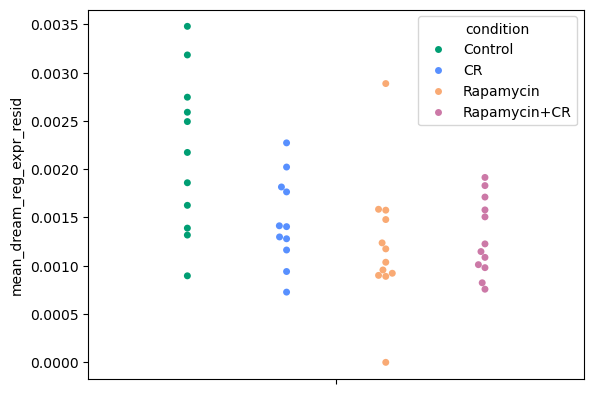

In [23]:
sns.swarmplot(
    data = fok_cr_2014.dream_expression, y = 'mean_dream_reg_expr_resid',
    hue = 'condition', palette=my_categorical_palette, dodge=True, 
    )
# test for a difference between each pair of conditions
for condition in fok_cr_2014.dream_expression['condition'].unique():
    for other_condition in fok_cr_2014.dream_expression['condition'].unique():
        if condition != other_condition:
            print(condition, other_condition, mannwhitneyu(
                fok_cr_2014.dream_expression.query(f"condition == '{condition}'")['mean_dream_reg_expr_resid'],
                fok_cr_2014.dream_expression.query(f"condition == '{other_condition}'")['mean_dream_reg_expr_resid']
            ).pvalue)

In [24]:
fok_cr_2014.test_differential_dream_expression(
    class_col = 'condition',
    treatment_classes = fok_cr_2014.metadata_df.query(
        "condition != 'Control'"
        )['condition'].unique().tolist(),
    control_class = 'Control',
    )

finished CR vs.  Control
finished Rapamycin vs.  Control
finished Rapamycin+CR vs.  Control


In [25]:
fok_cr_2014.all_gs_results_df

treatment_class control_class secondary_grouping  Name             Term  \
0              CR       Control                     gsea  dream_reg_genes   
0       Rapamycin       Control                     gsea  dream_reg_genes   
0    Rapamycin+CR       Control                     gsea  dream_reg_genes   

         ES       NES NOM p-val FDR q-val FWER p-val    Tag %  Gene %  \
0  0.209683  0.834519  0.753036  0.753036      0.372  163/252  55.18%   
0  0.259085   1.02218  0.442827  0.442827      0.213  167/252  56.34%   
0  0.331816  1.320367  0.066019  0.066019      0.034  126/252  39.21%   

                                          Lead_genes treatment_class  
0  ENSMUSG00000002109;ENSMUSG00000025358;ENSMUSG0...              CR  
0  ENSMUSG00000021501;ENSMUSG00000029910;ENSMUSG0...       Rapamycin  
0  ENSMUSG00000062822;ENSMUSG00000025358;ENSMUSG0...    Rapamycin+CR

# Meta expression

In [3]:
meta_expr = read_data.MetaExpressionDataset(
    dataset_names = ["boutant_nestle","martin_montalvo",
                    "zhou_2012","fok_chronic_2014", "fok_short_term_2014", "fok_cr_2014","tyshkovskiy"]
    )
meta_expr.scale_by_total_seq_depth()
meta_expr.get_dream_gene_expression()
meta_expr.dream_enrichment_ssgsea()
meta_expr.run_GSEA()

Loading dataset: boutant_nestle
Loading dataset: martin_montalvo
Loading dataset: zhou_2012
Loading dataset: fok_chronic_2014
Loading dataset: fok_short_term_2014
Loading dataset: fok_cr_2014
Loading dataset: tyshkovskiy
Converted DREAM genes to mouse genes
Found 252 DREAM genes with expression
scaled mean_dream_reg_expr by sequence depth and created mean_dream_reg_expr_resid
Converted DREAM genes to mouse genes
Found 252 DREAM genes with expression
scaled mean_dream_reg_expr by sequence depth and created mean_dream_reg_expr_resid
Converted DREAM genes to mouse genes
Found 277 DREAM genes with expression
scaled mean_dream_reg_expr by sequence depth and created mean_dream_reg_expr_resid
Converted DREAM genes to mouse genes
Found 252 DREAM genes with expression
scaled mean_dream_reg_expr by sequence depth and created mean_dream_reg_expr_resid
Converted DREAM genes to mouse genes
Found 203 DREAM genes with expression
scaled mean_dream_reg_expr by sequence depth and created mean_dream_reg_

/tmp/ipykernel_3184295/3553475405.py:3: UserWarning: The palette list has more values (9) than needed (6), which may not be intended.
  sns.pointplot(
/tmp/ipykernel_3184295/3553475405.py:3: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


Text(0, 0.5, 'DREAM complex activity enrichment\n(treatment vs. control)')

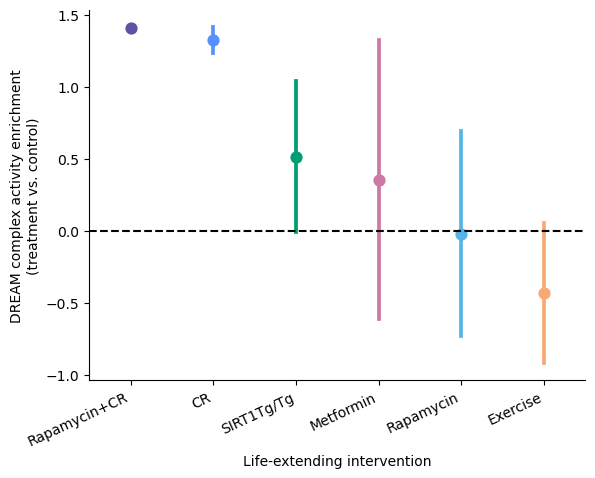

In [65]:
# permutation type = geneset and method = s2n
order = meta_expr.all_gs_results_df.query("dataset != 'tyshkovskiy'").groupby('treatment_class')['NES'].mean().sort_values(ascending = False).index.to_list()
sns.pointplot(
    data = meta_expr.all_gs_results_df.query("dataset != 'tyshkovskiy'"),
    x = 'treatment_class',
    y = 'NES', 
    join = False,
    order = order,
    hue = 'treatment_class',
    palette = my_categorical_palette,
    errorbar='se'
)
# angle x ticks
_ = plt.xticks(rotation=25, ha = 'right')
# draw dashed line at y = 0
plt.axhline(0, color='black', linestyle='--')
sns.despine()
plt.xlabel('Life-extending intervention')
plt.ylabel('DREAM complex activity enrichment\n(treatment vs. control)')

/tmp/ipykernel_3184295/3913620988.py:5: UserWarning: The palette list has more values (9) than needed (6), which may not be intended.
  sns.boxplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'DREAM complex activity enrichment\n(treatment vs. control)')

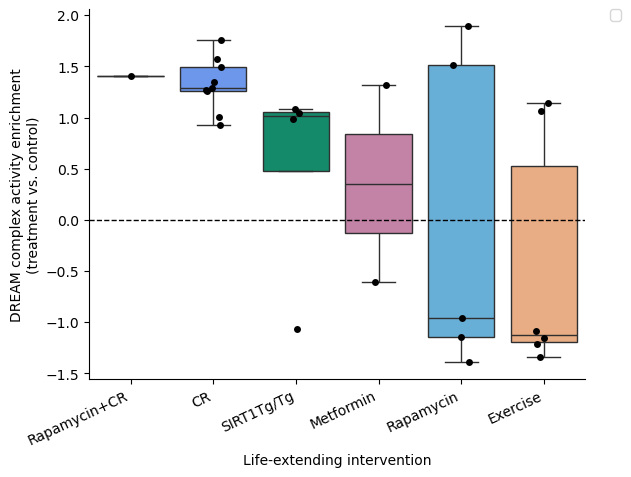

In [82]:
# permutation type = phenotypeand method = signal_to_noise
meta_expr.all_gs_results_df['p < 0.05'] = meta_expr.all_gs_results_df['FWER p-val'] < 0.05
# set order within each dataset
order = meta_expr.all_gs_results_df.query("dataset != 'tyshkovskiy'").groupby('treatment_class')['NES'].mean().sort_values(ascending = False).index.to_list()
sns.boxplot(
    data = meta_expr.all_gs_results_df.query("dataset != 'tyshkovskiy'"),
    y = 'NES', 
    # move farther apart
    x = 'treatment_class',
    hue = 'treatment_class',
    # make inside transparent
    showfliers = False,
    palette=my_categorical_palette,
    order = order
)
sns.stripplot(
    data = meta_expr.all_gs_results_df.query("dataset != 'tyshkovskiy'"),
    y = 'NES', 
    # move farther apart
    x = 'treatment_class',
    order = order,
    color = 'black'
)

# angle x ticks
_ = plt.xticks(rotation=25, ha = 'right')
sns.despine()
# move legend outside of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# draw dashed line at 0
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Life-extending intervention')
plt.ylabel('DREAM complex activity enrichment\n(treatment vs. control)')


In [84]:
meta_expr.all_gs_results_df

treatment_class control_class secondary_grouping  Name  \
0               SIRT1Tg/Tg       Control              liver  gsea   
1                       CR       Control              liver  gsea   
2                 Exercise       Control              liver  gsea   
3               SIRT1Tg/Tg       Control             muscle  gsea   
4                       CR       Control             muscle  gsea   
5                 Exercise       Control             muscle  gsea   
6               SIRT1Tg/Tg       Control                BAT  gsea   
7                       CR       Control                BAT  gsea   
8                 Exercise       Control                BAT  gsea   
9               SIRT1Tg/Tg       Control                WAT  gsea   
10                      CR       Control                WAT  gsea   
11                Exercise       Control                WAT  gsea   
12               Metformin       Control             Muscle  gsea   
13                      CR       Control             Muscle  gsea   
14               Metformin       Control              Liver  gsea   
15                      CR       Control              Liver  gsea   
16                Exercise       Control                 LF  gsea   
17                      CR       Control                 LF  gsea   
18                Exercise       Control                 HF  gsea   
19                      CR       Control                 HF  gsea   
20               Rapamycin       Control               male  gsea   
21               Rapamycin       Control             female  gsea   
22               Rapamycin       Control               male  gsea   
23               Rapamycin       Control             female  gsea   
24                      CR       Control                     gsea   
25               Rapamycin       Control                     gsea   
26            Rapamycin+CR       Control                     gsea   
27                Acarbose       Control                12   gsea   
28                      CR       Control                12   gsea   
29               Rapamycin       Control                12   gsea   
30                Acarbose       Control                 6   gsea   
31                      CR       Control                 6   gsea   
32               Rapamycin       Control                 6   gsea   
33               Protandim       Control                 6   gsea   
34      17-alpha-estradiol       Control                 6   gsea   
35                   GHRKO       Control                 5   gsea   
36  Methionine Restriction       Control                14   gsea   

               Term        ES       NES NOM p-val FDR q-val FWER p-val  \
0   dream_reg_genes  0.136618  0.986678  0.524194  0.524194       0.52   
1   dream_reg_genes  0.210096  1.261512  0.055785  0.055785      0.027   
2   dream_reg_genes -0.271529  -1.34275  0.017647  0.017647   0.017647   
3   dream_reg_genes -0.212827 -1.061325     0.272     0.272      0.272   
4   dream_reg_genes  0.245422   1.28853  0.055714  0.055714      0.039   
5   dream_reg_genes -0.165746 -1.153751      0.19      0.19       0.19   
6   dream_reg_genes   0.20854  1.045185      0.39      0.39       0.39   
7   dream_reg_genes  0.236402  1.270378  0.068718  0.068718      0.067   
8   dream_reg_genes  0.221207  1.139871  0.203252  0.203252        0.2   
9   dream_reg_genes  0.314653   1.08527     0.181     0.181      0.181   
10  dream_reg_genes   0.17754  0.922964  0.658787  0.658787      0.641   
11  dream_reg_genes  0.203601  1.060153     0.353     0.353      0.353   
12  dream_reg_genes -0.150498 -0.609754  0.997745  0.997745   0.997745   
13  dream_reg_genes  0.305254  1.760846       0.0       0.0        0.0   
14  dream_reg_genes  0.352123  1.320312  0.030151  0.030151       0.03   
15  dream_reg_genes  0.340417  1.346778  0.025562  0.025562      0.025   
16  dream_reg_genes -0.265933 -1.088308  0.275532  0.275532   0.275532   
17  dream_reg_genes  0.347449   1.56889       0.0       

/tmp/ipykernel_3184295/1629182977.py:16: UserWarning: 
The palette list has fewer values (9) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(


Text(0, 0.5, 'DREAM complex activity enrichment\n(treatment vs. control)')

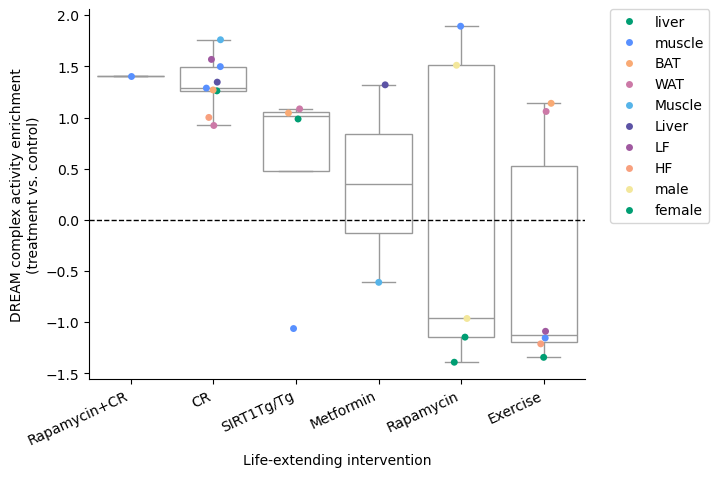

In [87]:
# permutation type = phenotypeand method = signal_to_noise
meta_expr.all_gs_results_df['p < 0.05'] = meta_expr.all_gs_results_df['FWER p-val'] < 0.05
# set order within each dataset
order = meta_expr.all_gs_results_df.query("dataset != 'tyshkovskiy'").groupby('treatment_class')['NES'].mean().sort_values(ascending = False).index.to_list()
sns.boxplot(
    data = meta_expr.all_gs_results_df.query("dataset != 'tyshkovskiy'"),
    y = 'NES', 
    # move farther apart
    x = 'treatment_class',
    #hue = 'treatment_class',
    # make inside transparent
    showfliers = False,
    color = 'white',
    order = order
)
sns.stripplot(
    data = meta_expr.all_gs_results_df.query("dataset != 'tyshkovskiy'"),
    y = 'NES', 
    # move farther apart
    x = 'treatment_class',
    order = order,
    hue = 'secondary_grouping',
    color = 'black',
    palette = my_categorical_palette
)

# angle x ticks
_ = plt.xticks(rotation=25, ha = 'right')
sns.despine()
# move legend outside of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# draw dashed line at 0
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Life-extending intervention')
plt.ylabel('DREAM complex activity enrichment\n(treatment vs. control)')


/tmp/ipykernel_3184295/2750879736.py:5: UserWarning: 
The palette list has fewer values (9) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'DREAM complex activity enrichment\n(treatment vs. control)')

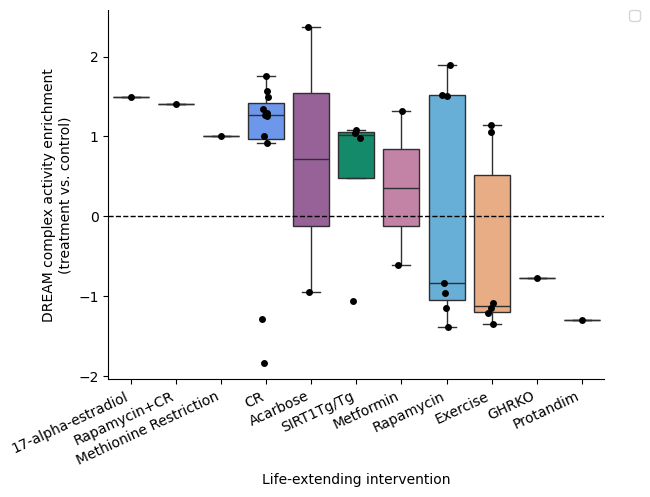

In [90]:
# permutation type = phenotypeand method = signal_to_noise
meta_expr.all_gs_results_df['p < 0.05'] = meta_expr.all_gs_results_df['FWER p-val'] < 0.05
# set order within each dataset
order = meta_expr.all_gs_results_df.groupby('treatment_class')['NES'].mean().sort_values(ascending = False).index.to_list()
sns.boxplot(
    data = meta_expr.all_gs_results_df,
    y = 'NES', 
    # move farther apart
    x = 'treatment_class',
    hue = 'treatment_class',
    # make inside transparent
    showfliers = False,
    palette=my_categorical_palette,
    order = order,
    legend = False
    
)
sns.stripplot(
    data = meta_expr.all_gs_results_df,
    y = 'NES', 
    # move farther apart
    x = 'treatment_class',
    order = order,
    color = 'black',
    legend = False
)

# angle x ticks
_ = plt.xticks(rotation=25, ha = 'right')
sns.despine()
# move legend outside of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# draw dashed line at 0
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Life-extending intervention')
plt.ylabel('DREAM complex activity enrichment\n(treatment vs. control)')
# remove legend

/tmp/ipykernel_3184295/3889560230.py:16: UserWarning: 
The palette list has fewer values (9) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(


Text(0, 0.5, 'DREAM complex activity enrichment\n(treatment vs. control)')

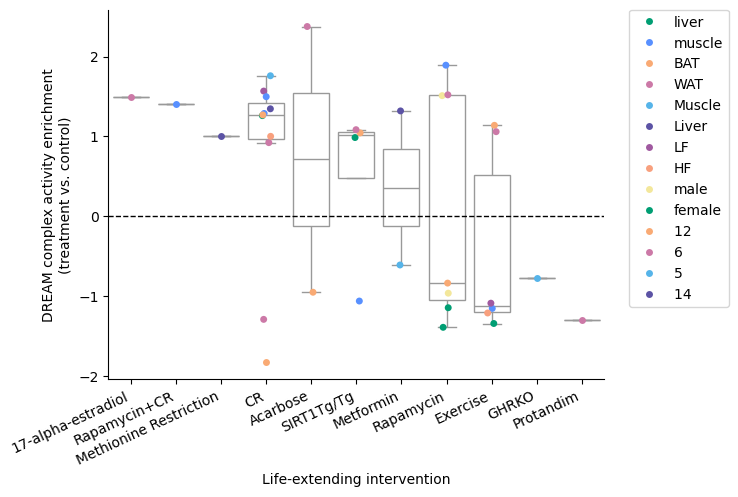

In [89]:
# permutation type = phenotypeand method = signal_to_noise
meta_expr.all_gs_results_df['p < 0.05'] = meta_expr.all_gs_results_df['FWER p-val'] < 0.05
# set order within each dataset
order = meta_expr.all_gs_results_df.groupby('treatment_class')['NES'].mean().sort_values(ascending = False).index.to_list()
sns.boxplot(
    data = meta_expr.all_gs_results_df,
    y = 'NES', 
    # move farther apart
    x = 'treatment_class',
    #hue = 'treatment_class',
    # make inside transparent
    showfliers = False,
    color = 'white',
    order = order
)
sns.stripplot(
    data = meta_expr.all_gs_results_df,
    y = 'NES', 
    # move farther apart
    x = 'treatment_class',
    order = order,
    hue = 'secondary_grouping',
    color = 'black',
    palette = my_categorical_palette
)

# angle x ticks
_ = plt.xticks(rotation=25, ha = 'right')
sns.despine()
# move legend outside of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# draw dashed line at 0
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Life-extending intervention')
plt.ylabel('DREAM complex activity enrichment\n(treatment vs. control)')
